In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Data\\train.csv")

Każdy rysunek składa się z 784 pikseli: 28 x 28

In [3]:
df.shape

(42000, 785)

In [4]:
df.head(10)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
df.dtypes

label       int64
pixel0      int64
pixel1      int64
pixel2      int64
pixel3      int64
            ...  
pixel779    int64
pixel780    int64
pixel781    int64
pixel782    int64
pixel783    int64
Length: 785, dtype: object

In [6]:
df.isna().sum().sum()

0

Nie ma brakujących wartości

In [7]:
df["label"].value_counts()

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

<AxesSubplot: >

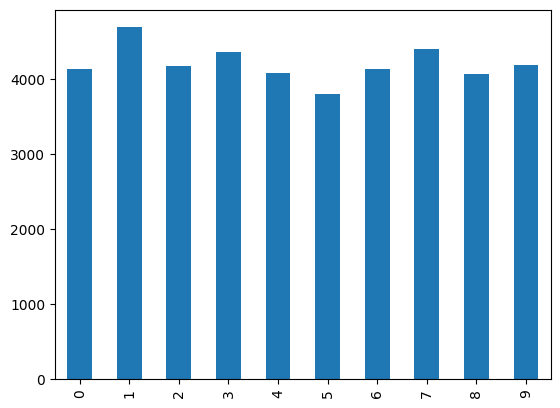

In [10]:
df["label"].value_counts().sort_index().plot.bar()

### Wizualizacja kilku cyfr

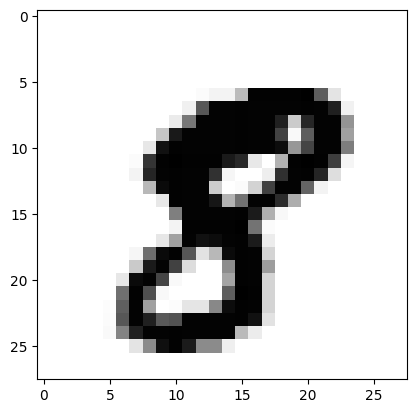

In [31]:
arr = df.iloc[10, 1:].to_numpy().reshape((28,28))

plt.imshow(arr, cmap="Greys")

In [45]:
def plot_digits(df, rows = 5, cols = 5, figsize = (8,12)):
    fig, ax = plt.subplots(nrows=rows, ncols=cols, figsize=figsize)

    i = 0
    for r in range(rows):
        for c in range(cols):
            arr = df.iloc[i, 1:].to_numpy().reshape((28,28))
            ax[r, c].imshow(arr, cmap="Greys")
            ax[r, c].set_title(df.iloc[i, 0])
            i += 1

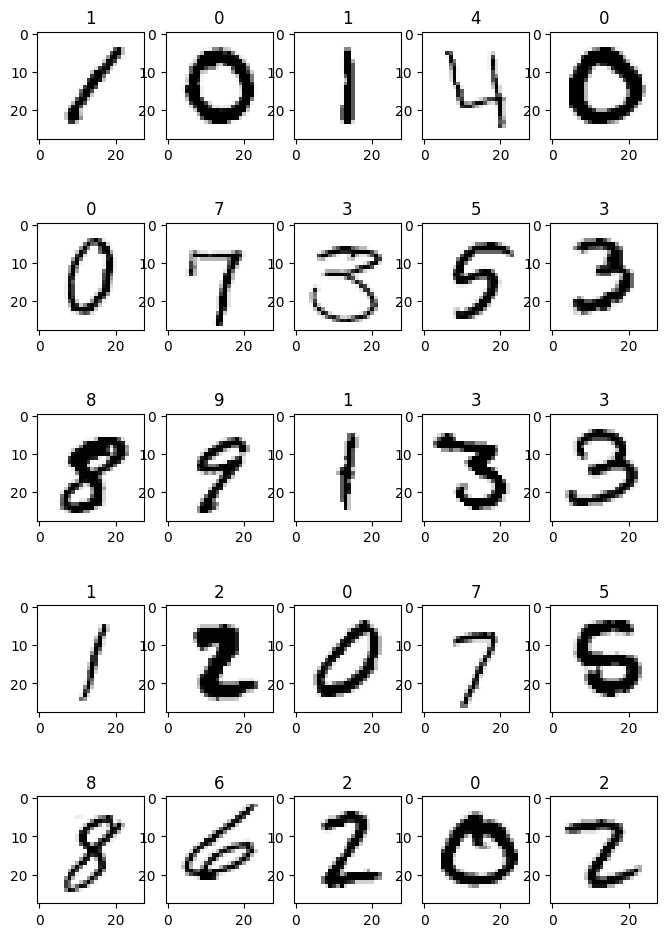

In [46]:
plot_digits(df[:25])

### Wizualizacja średniej cyfry

In [170]:
def plot_avg_digit(df, rows=4, cols=3):
    fig, ax = plt.subplots(nrows=rows, ncols=cols, figsize=(8,8))

    i = 0
    for r in list(range(rows)):
        for c in list(range(cols)):
            arr = df[df["label"] == i].iloc[:,1:].mean().to_numpy().reshape((28,28))
            if np.all(np.isnan(arr)):
                i += 1
                fig.delaxes(ax[r,c])
                continue
            ax[r, c].imshow(arr, cmap="Greys")
            ax[r, c].set_title(i)
            i += 1


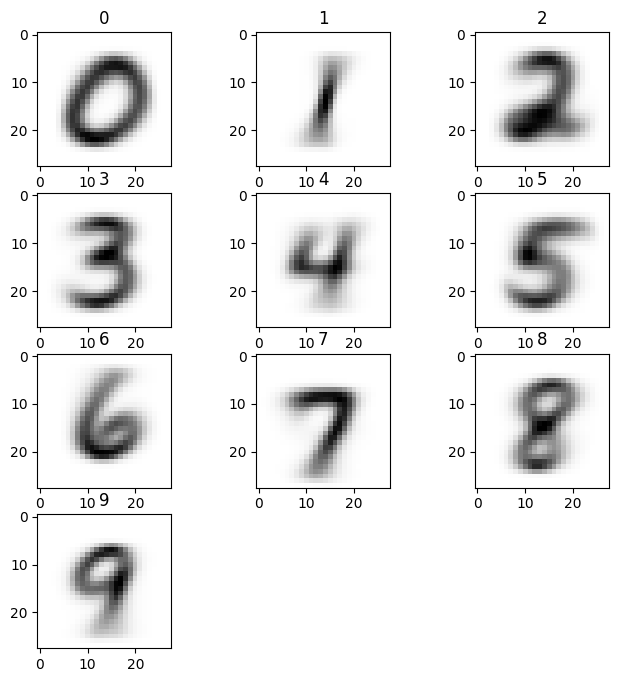

In [171]:
plot_avg_digit(df)